In [19]:
%run load_data.py 'train'
X_train, y_train = images, labels

In [47]:
labels[1,0]

IndexError: too many indices for array

In [21]:
%run load_data.py 't10k'
X_test, y_test = images, labels

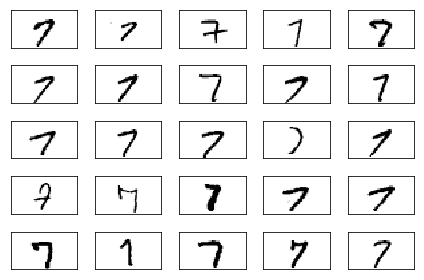

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True) # 参数意义？
ax = ax.flatten() # 图形矩阵转换为array
for i in range(25):
    img = X_train[y_train==7][i].reshape(28, 28) # 第一个为i的数据
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([]) # 不设置刻度（默认会自动设置刻度）
ax[0].set_yticks([]) # 不设置刻度
plt.tight_layout()
plt.show()

In [29]:
help(ax.flatten)

NameError: name 'ax' is not defined

In [45]:
np.savetxt('../data/train_img.csv', X_train, fmt='%d', delimiter=',') # fmt
np.savetxt('../data/train_label.csv', y_train, fmt='%d', delimiter=',') # fmt
np.savetxt('../data/test_img.csv', X_test, fmt='%d', delimiter=',') # fmt
np.savetxt('../data/test_label.csv', y_test, fmt='%d', delimiter=',') # fmt
# X_train = np.genfromtxt('...', dtype=int, delimiter=',')

In [1]:
import numpy as np
X_train = np.loadtxt('../data/train_img.csv', dtype=int, delimiter=',') # fmt
y_train = np.loadtxt('../data/train_label.csv', dtype=int, delimiter=',') # fmt
X_test = np.loadtxt('../data/test_img.csv', dtype=int, delimiter=',') # fmt
y_test = np.loadtxt('../data/test_label.csv', dtype=int, delimiter=',') # fmt
X_train.shape

(60000, 784)

In [4]:
%run neuralnet.py # 在jupyter中运行会报错？

In [38]:
nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

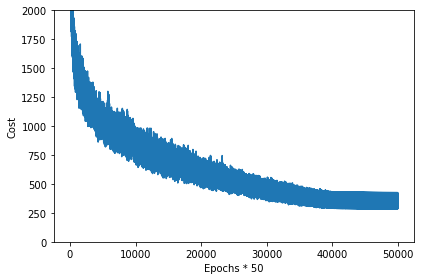

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
plt.show()

In [42]:
import pickle
pickle.dump(nn, open('model', 'wb'), protocol=4)

In [5]:
import pickle
model = pickle.load(open('model', 'rb'))
y_train_pred = model.predict(X_train)
acc = np.sum(y_train==y_train_pred, axis=0)/X_train.shape[0]
print(acc)

0.9769


In [7]:
y_test_pred = model.predict(X_test)
acc = np.sum(y_test==y_test_pred, axis=0)/X_test.shape[0]
print(acc)

0.9595


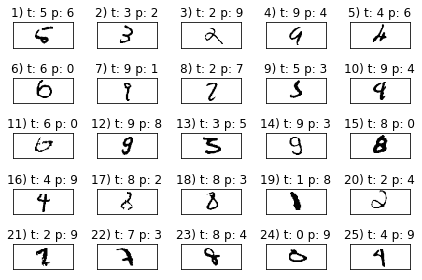

In [12]:
import matplotlib.pyplot as plt
miscl_img = X_test[y_test!=y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28,28) # 转化为28*28的矩阵
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()